<a href="https://colab.research.google.com/github/emmaahong/mediabias/blob/main/Emma_Hong_media_bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install opendatasets
! pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.7 MB/s eta 0:00:00


In [ ]:
# ------- IMPORTING LIBRARIES ------- #
! pip install kaggle
import opendatasets as od
import subprocess
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.text import text_to_word_sequence
import nltk
from keras_preprocessing.sequence import pad_sequences
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from spacy.lang.en.stop_words import STOP_WORDS
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
!python -m spacy download en_core_web_md
import en_core_web_md
text_to_nlp = en_core_web_md.load()

2023-07-09 14:19:31.701699: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 14.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
from gensim.models import Word2Vec

In [ ]:
def newDataframe(path, dataframes):
  dataframes.append(pd.read_csv(path))
  return pd.read_csv(path)

downloading the csv files

In [ ]:
datasets = ['https://www.kaggle.com/datasets/snapcrack/all-the-news',
             'https://www.kaggle.com/datasets/amogh7joshi/wsj-headline-classification',
             'https://www.kaggle.com/datasets/stephgraban/wall-street-journal-articles-20142020',
            'https://www.kaggle.com/datasets/notlucasp/financial-news-headlines','kaggle.json']

for dataset in datasets:
  if not os.path.exists(dataset):
    od.download(dataset)


Skipping, found downloaded files in "./all-the-news" (use force=True to force download)
Skipping, found downloaded files in "./wsj-headline-classification" (use force=True to force download)
Skipping, found downloaded files in "./wall-street-journal-articles-20142020" (use force=True to force download)
Skipping, found downloaded files in "./financial-news-headlines" (use force=True to force download)


In [ ]:
paths = ['all-the-news/articles1.csv',
         'all-the-news/articles2.csv',
         'all-the-news/articles3.csv',
         'financial-news-headlines/cnbc_headlines.csv',
         'financial-news-headlines/reuters_headlines.csv',
         'wall-street-journal-articles-20142020/wsj2014_2020.csv',
         'wsj-headline-classification/wsj_headlines.csv']

# omission of guardian due to existing prevalence of left-leaning data already

dataframes = []
for path in paths:
  new_dataframe = newDataframe(path, dataframes)

In [ ]:
dataframes[3].head()
# dataframes[4].head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."


In [ ]:
wsj_1_columns = ['headlines']
atn_columns = ['title', 'publication']
wsj_columns = ['Headline']
cnbc_columns=['Headlines']
reuters_columns=['Headlines']

atn_dfs = dataframes[0:3]

cnbc_df_raw = dataframes[3]

reuters_df_raw = dataframes[3]

wsj_1_df_raw = dataframes[5]

wsj_df_raw = dataframes[6]





In [ ]:
atn_df_raw = pd.concat([
    atn_dfs[0],
    atn_dfs[1],
    atn_dfs[2]
])



In [ ]:
# total_lines_1 = len(all_nyt_dfs)
# total_lines_2 = 0
# for i in range(len(nyt_dfs)):
#   print(len(nyt_dfs[i]))
#   total_lines_2 += len(nyt_dfs[i])

# print(total_lines_1, total_lines_2)

In [ ]:
atn_df_slice = atn_df_raw[atn_columns]
wsj_1_df_slice = wsj_1_df_raw[wsj_1_columns]
wsj_df_slice = wsj_df_raw[wsj_columns]
cnbc_df_slice = cnbc_df_raw[cnbc_columns]
reuters_df_slice = reuters_df_raw[reuters_columns]

reuters_df_slice.head()

,Headlines
0,Jim Cramer: A better way to invest in the Covi...
1,Cramer's lightning round: I would own Teradyne
2,NaN
3,"Cramer's week ahead: Big week for earnings, ev..."
4,IQ Capital CEO Keith Bliss says tech and healt...


In [ ]:
atn_df_slice = atn_df_slice.rename(columns = {
    "title":"headline"
})

wsj_df_slice = wsj_df_slice.rename(columns = {
    "Headline":"headline"
})

wsj_1_df_slice = wsj_1_df_slice.rename(columns = {
    "headlines":"headline"
})

cnbc_df_slice = wsj_1_df_slice.rename(columns = {
    "Headlines":"headline"
})

reuters_df_slice = wsj_1_df_slice.rename(columns = {
    "Headlines":"headline"
})

wsj_df_slice = wsj_df_slice.assign(publication='Wall Street Journal')
wsj_df_slice = wsj_df_slice.assign(bias=0.1)

wsj_1_df_slice = wsj_1_df_slice.assign(publication='Wall Street Journal')
wsj_1_df_slice = wsj_1_df_slice.assign(bias=0.1)

cnbc_df_slice = cnbc_df_slice.assign(publication='CNBC')
cnbc_df_slice = cnbc_df_slice.assign(bias=-0.9)

reuters_df_slice = reuters_df_slice.assign(publication='Reuters')
reuters_df_slice = reuters_df_slice.assign(bias=-0.7)

atn_df_slice = atn_df_slice.assign(bias=0)

atn_df_slice['bias'] = atn_df_slice['publication'].apply(lambda x: -2.2 if x == 'New York Times'
                                                         else 0.1 if x == 'Wall Street Journal'
                                                         else -2.8 if x=='Atlantic'
                                                         else 5 if x=='Breitbart'
                                                         else -3.8 if x=='CNN'
                                                         else -2.6 if x=='Business Insider'
                                                         else 3.7 if x=='Fox News'
                                                         else -4 if x=='Buzzfeed News'
                                                         else 3.7 if x=='National Review'
                                                         else 1.8 if x=='New York Post'
                                                         else -2.4 if x=='Guardian'
                                                         else -2 if x=='NPR'
                                                         else -0.8 if x=='Reuters'
                                                         else -4 if x=='Vox'
                                                         else -2.2 if x=='Washington Post'
                                                         else 0)

# ATN PUBLICATIONS: New York Times, Breitbart, CNN, Business Insider, the Atlantic, Fox News, Talking Points Memo, Buzzfeed News, National Review, New York Post, the Guardian, NPR, Reuters, Vox, and the Washington Post.
total_length = len(atn_df_slice) + len(reuters_df_slice) + len(cnbc_df_slice) + len(wsj_df_slice) + len(wsj_1_df_slice)
print(total_length)

168406


In [ ]:
# |----- WSJ Random Row Removal -----|
remove_percent_wsj = 0.98

# Calculate the number of rows to remove
num_rows_to_remove_wsj = int(len(wsj_1_df_slice) * remove_percent_wsj)

# randomly remove rows
wsj_1_df_slice = wsj_1_df_slice.sample(frac=1-remove_percent_wsj, random_state=42)

# length of filtered dataframe
print(f'WSJ Dataframe: {len(wsj_1_df_slice)}')

# |----- CNBC Random Row Removal -----|
remove_percent_cnbc = 0.95

# Calculate the number of rows to remove
num_rows_to_remove_cnbc = int(len(cnbc_df_slice) * remove_percent_cnbc)

# randomly remove rows
cnbc_df_slice = cnbc_df_slice.sample(frac=1-remove_percent_cnbc, random_state=42)

# length of filtered dataframe
print(f'CNBC Dataframe: {len(cnbc_df_slice)}')

# |----- Reuters Random Row Removal -----|
remove_percent_reuters = 0.95

# Calculate the number of rows to remove
num_rows_to_remove_reuters = int(len(reuters_df_slice) * remove_percent_reuters)

# randomly remove rows
reuters_df_slice = reuters_df_slice.sample(frac=1-remove_percent_reuters, random_state=42)

# length of filtered dataframe
print(f'Reuters Dataframe: {len(reuters_df_slice)}')

all_df_1 = pd.concat([atn_df_slice,
                      wsj_df_slice,
                      wsj_1_df_slice,
                      reuters_df_slice,
                      cnbc_df_slice,])
print(len(all_df_1))

all_df = all_df_1.dropna()
percent_removed = (len(all_df_1)-len(all_df))/len(all_df_1)
print(f'NaN {percent_removed}% removed')

remove_rows = all_df.loc[all_df['publication'] == 'Talking Points Memo']
print(len(remove_rows))
all_df.tail()

WSJ Dataframe: 2203
CNBC Dataframe: 5508
Reuters Dataframe: 5508
175016
NaN 1.1427526626137039e-05% removed
5213


,headline,publication,bias
6666,Giants’ Running Back of the Future Probably No...,CNBC,-0.9
92138,Graham Hints Trump Could Draw Down U.S. Troops...,CNBC,-0.9
27300,Why Too Many Choices in Your 401(k) May Be a B...,CNBC,-0.9
78207,Art Galleries Brush Off Chelsea for Tribeca,CNBC,-0.9
79589,Can We Listen to Michael Jackson and R. Kelly ...,CNBC,-0.9


In [ ]:
print('Removing all data points from Talking Points Memo due to lack of rating by AllSides media bias rating')
print(f'{len(remove_rows)} is removed from {len(all_df)}')
all_df_1 = all_df[all_df.publication != 'Talking Points Memo']
percent_removed = len(remove_rows)/len(all_df)*100
print("%.2f" % percent_removed, end='')
print('% removed')
print(f'Dataset has {len(all_df_1)} rows')

print('\nRemoving all duplicate data points')
all_df_2 = all_df_1.drop_duplicates()
percent_removed=((len(all_df_1)-len(all_df_2))/len(all_df_1))*100
print("%.2f" % percent_removed, end='')
print('% removed')
print(f'Dataset has {len(all_df_2)} rows')


Removing all data points from Talking Points Memo due to lack of rating by AllSides media bias rating
5213 is removed from 175014
2.98% removed
Dataset has 169801 rows

Removing all duplicate data points
0.64% removed
Dataset has 168715 rows


2203
19227
142570
5508
5508


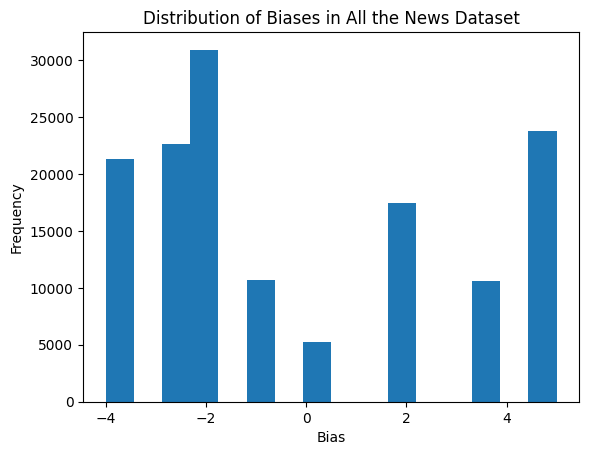

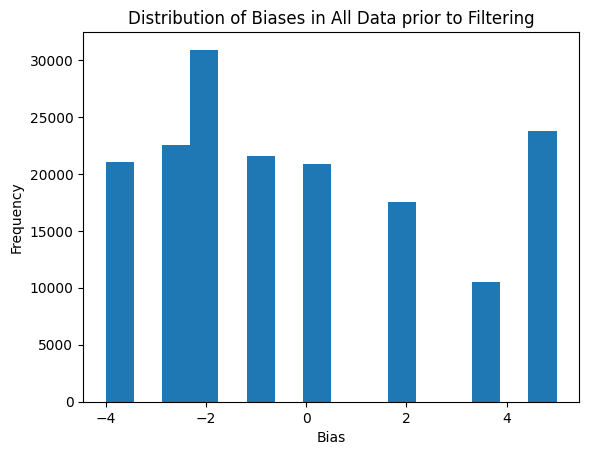

In [ ]:

print(len(wsj_1_df_slice))
print(len(wsj_df_slice))
print(len(atn_df_slice))
print(len(reuters_df_slice))
print(len(cnbc_df_slice))

plt.hist(atn_df_slice['bias'], bins=16)
plt.xlabel('Bias')
plt.ylabel('Frequency')
plt.title('Distribution of Biases in All the News Dataset')
plt.show()

plt.hist(all_df_2['bias'], bins=16)
plt.xlabel('Bias')
plt.ylabel('Frequency')
plt.title('Distribution of Biases in All Data prior to Filtering')
plt.show()

In [ ]:

all_df_2['right_or_left'] = np.where(all_df_2['bias'] >= 0, 'right', 'left')

<ipython-input-17-78bfb420ede4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df_2['right_or_left'] = np.where(all_df_2['bias'] >= 0, 'right', 'left')


In [ ]:
X_text = all_df_2['headline']
y = all_df_2['right_or_left']

In [ ]:
tokenized_text = [word_tokenize(text) for text in X_text]

X_train, X_test, y_train, y_test = train_test_split(tokenized_text, y, test_size=0.2, random_state=42)


In [ ]:
model = Word2Vec(X_train, vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
word_vectors = model.wv

In [ ]:
X_train_vec = []
X_test_vec = []

for tokens in X_train:
    vectors = [word_vectors[word] for word in tokens if word in word_vectors]
    if vectors:
        X_train_vec.append(np.mean(vectors, axis=0))
    else:
        X_train_vec.append(np.zeros(word_vectors.vector_size))

for tokens in X_test:
    vectors = [word_vectors[word] for word in tokens if word in word_vectors]
    if vectors:
        X_test_vec.append(np.mean(vectors, axis=0))
    else:
        X_test_vec.append(np.zeros(word_vectors.vector_size))

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)



In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train_vec, y_train_encoded)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Make predictions on the test set
y_pred_encoded = classifier.predict(X_test_vec)

# Decode predictions
y_pred = label_encoder.inverse_transform(y_pred_encoded)



In [ ]:
accuracy = (accuracy_score(y_test_encoded, y_pred_encoded))*100
print("Accuracy:", accuracy, "%")

Accuracy: 75.00814983848501 %
